# Stocks investments

> Comparing 2 Stocks file strategy 'Buy and Hold' and 'Arima' models 

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#| default_exp arima_stats

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
barak = [1,2,3]
diker = [3,4,5]
barak + diker

[1, 2, 3, 3, 4, 5]

In [ ]:
#| export 

#import torch
import pandas as pd
from collections import OrderedDict
import numpy as np
import pmdarima as pm
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
#| export
def foo(name): 
    return "Hello HAHAHAH" + name

In [ ]:
#| export
def say_hello(to):
    "Say hello to somebody"
    return f'Hello {to}!'

In [ ]:
#| export 
def create_arima_prediction(series):
    auto_arima = pm.auto_arima(series, stepwise=False, seasonal=False)

In [ ]:
#| hide
series_data = yf.download('LUMI.TA', start='2021-12-10', end='2022-12-30')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#| hide
#auto_arima = pm.auto_arima(data['High'].to_numpy())
series_data.index[0]
pd.Series(pd.date_range(series_data.index[0], freq="B", periods=30)) # "1/1/2011"
series_data.index

DatetimeIndex(['2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-19', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23',
               ...
               '2022-12-18', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-25', '2022-12-26', '2022-12-27',
               '2022-12-28', '2022-12-29'],
              dtype='datetime64[ns]', name='Date', length=259, freq=None)

In [ ]:
#| hide
barak = pd.Series([None,None])
print(barak.isna().sum())

2


In [ ]:
#| export 




def create_auto_arima_prediction(series_data, prediction_depth=30):
    """
    Given pandas series return a series with the same indexes (Dates)
    """
    df = pd.DataFrame()
    df['High'] = series_data
    df.index = np.arange(len(df))

    msk = (df.index < len(df)-prediction_depth)
    df_train = df[msk].copy()
    df_test = df[~msk].copy()

    df_train = df_train['High']
    df_test = df_test['High']
    
    #print(df_train.isna().sum())
    
    # Doesn't work very well , Trying to Autocreate the arima parameters
    #auto_arima = pm.auto_arima(df_train.to_numpy())
    
    auto_arima = pm.auto_arima(df_train.to_numpy(), start_p=1, start_q=1,d=0, max_p=5, max_q=5,
                      out_of_sample_size=10, suppress_warnings=True,
                      stepwise=True, error_action='ignore')
    
    forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
  
    
    auto_pred = pd.Series([None]*len(df_train) + list(forecast_test_auto))
    auto_pred.index = series_data.index
    print(auto_arima)
    #df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

    #from statsmodels.tsa.arima.model import ARIMA
    #model = ARIMA(df_train, order=(2,1,3))
    #model_fit = model.fit()
    #forecast_test = model_fit.forecast(len(df_test))
    #df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)
    #return df['forecast_auto']
    return auto_pred


In [ ]:
#| export 

def create_auto_arima_prediction_future_2(series_data,future=60):
    temp_series = pd.Series(series_data)
    temp_series=pd.concat([temp_series,pd.Series([None]*future , index=pd.date_range(series_data.index[-1], freq='D', periods=future))])
    auto_pred = create_auto_arima_prediction(temp_series,future)
    return auto_pred

In [ ]:
#| export 

def create_dataframe_with_series(func , series_data):
    pred_series = func(series_data)
    df = pd.DataFrame()
    df['pred'] = pred_series
    df['High'] = series_data
    return df

 ARIMA(1,0,1)(0,0,0)[0] intercept


<Axes: >

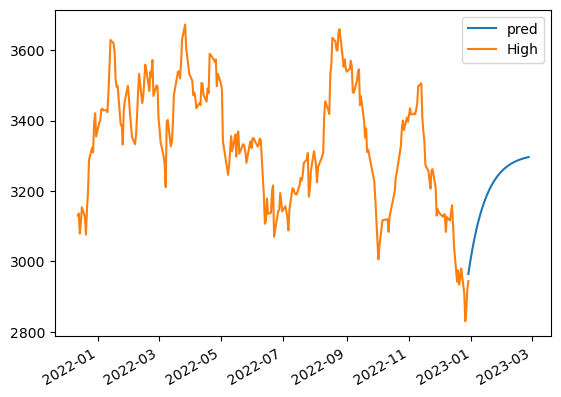

In [ ]:
#| hide
df = create_dataframe_with_series(create_auto_arima_prediction_future_2 , series_data['High'])
df.plot()


In [ ]:

nan_rows = df.isna().any(axis=1).sum()
print(nan_rows)
print(len(df))
df


318
319


,pred,High
2021-12-12,NaN,3130.0
2021-12-13,NaN,3136.0
2021-12-14,NaN,3079.0
2021-12-15,NaN,3109.0
2021-12-16,NaN,3154.0
...,...,...
2023-02-22,3293.612364,NaN
2023-02-23,3294.398570,NaN
2023-02-24,3295.140227,NaN
2023-02-25,3295.839861,NaN


 ARIMA(1,0,1)(0,0,0)[0] intercept


<Axes: >

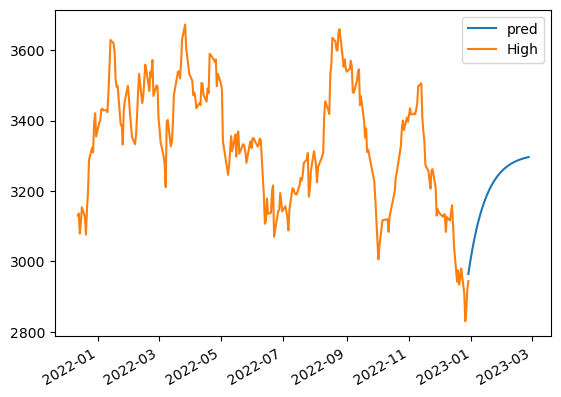

In [ ]:
#| hide
pred_series = create_auto_arima_prediction_future_2(series_data['High'])
df = pd.DataFrame()
df['pred'] = pred_series
df['High'] = series_data['High']
#pred_series.index = df.index

df.plot()

 ARIMA(1,0,1)(0,0,0)[0] intercept


<Axes: xlabel='Date'>

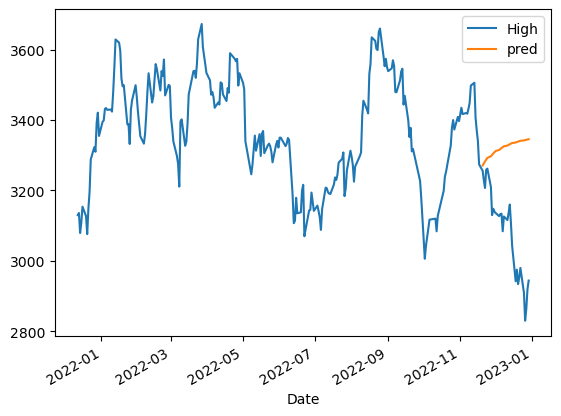

In [ ]:
#| hide
pred_series = create_auto_arima_prediction(series_data['High'])
df = pd.DataFrame()
df['High'] = series_data['High']
#pred_series.index = df.index
df['pred'] = pred_series
df.plot()

## Sample on how to create auto-arima model 

<Axes: >

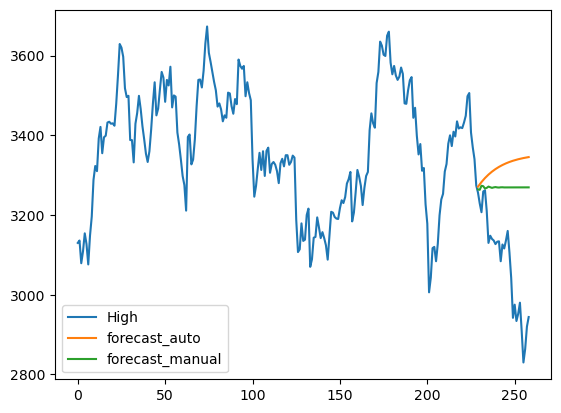

In [ ]:
#| hide

df = pd.DataFrame()
df['High'] = series_data['High']
df.index = np.arange(len(df))

msk = (df.index < len(df)-30)
df_train = df[msk].copy()
df_test = df[~msk].copy()

df_train = df_train['High']
df_test = df_test['High']

# Doesn't work very well , Trying to Autocreate the arima parameters
auto_arima = pm.auto_arima(df_train.to_numpy())
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

model = ARIMA(df_train, order=(2,1,3))
model_fit = model.fit()
forecast_test = model_fit.forecast(len(df_test))
df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)


#df.plot(['High','forecast_auto'])
df.plot()


In [ ]:
# after one differencing the data is stationary 
#df_train_diff = df_train.diff().dropna()
#df_train_diff.plot()

In [ ]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#acf_diff = plot_acf(df_train_diff)

#pacf_diff = plot_pacf(df_train_diff)

In [ ]:
#| hide
#import nbdev; nbdev.nbdev_export()

In [ ]:
#| hide
print("barak")

barak


In [ ]:
from fastcore.test import *
from IPython.display import display,SVG

In [ ]:

test_eq(say_hello("Hamel"), "Hello Hamel!")

In [ ]:

display(SVG('<svg height="100" xmlns="http://www.w3.org/2000/svg"><circle cx="50" cy="50" r="40"/></svg>'))

In [ ]:
#| export
def create_dataframe(companies , series_name='High'): # for example companies = ["LUMI.TA","DSCT.TA"]
    tickers = [yf.Ticker(ticker).history( start='2020-12-10')[series_name].rename(ticker) for ticker in companies]
    df = pd.concat(tickers, axis=1)
    return df
    

In [ ]:

#| export 
def get_top_players(data, n=2, order=False):
    """Get top n players by score. 

    Returns a dictionary or an `OrderedDict` if `order` is true.
    """ 
    #top = sorted(data.items(), reverse=True)[:n]
    #if order:
    #    return OrderedDict(top)
    #return dict(top)
    return dict(sorted(data.items(), key=lambda x:x[1],reverse=True)[:n])
    #return dict(sorted(data , reverse=True)[:n])

In [ ]:
#| export 
def top_score(df ,current_day , days=30 , top =2): 
    """
    df - a pd.DataFrame where each series is a stock for example the "High" of leumi 
    current_day - can use current_day and all days before 
    example to current_day -> current_day = "2022-12-10"
    days - how many days to predict into the future 
    example for days -> days = 30 
    top - select the top performed stocks for investing 
    """
    dict_profit = {}
    for series in df:
        #print(df[series].iloc[0])
        #print(df[series])
        #print(df[series].loc[:current_day])
        dataframe_predict = create_dataframe_with_series(create_auto_arima_prediction_future_2 , df[series].loc[:current_day])
        profit = dataframe_predict['pred'].dropna().iloc[days] - dataframe_predict['pred'].dropna().iloc[0]
        dict_profit[series] = profit
        #print(profit) 
    #print(dict_profit)
    #print(get_top_players(dict_profit,n=top))
    return get_top_players(dict_profit,n=top) # Best to invest ! 

In [ ]:
#| hide
df = create_dataframe(["LUMI.TA" , "DSCT.TA","MTRX.TA",
                        "TEVA.TA",
                        "POLI.TA",
                        "MZTF.TA",
                        "FIBI.TA",
                        "HARL.TA",
                        "MGDL.TA",
                        "CLIS.TA",
                        "PHOE.TA",
                      ])
df["LUMI.TA"]
date = "2022-12-13"
dict_best_to_invest = top_score(df,date)
total_profit_of_best = sum(dict_best_to_invest.values())
print("ARIMA expected profits are: " , total_profit_of_best)

sum_arima_true = 0 
for series in dict_best_to_invest:
    sum_arima_true += df[series].loc[date:].iloc[30] - df[series].loc[date:].iloc[0]
print("ARIMA True profits are :" ,sum_arima_true )
df_ta35 = create_dataframe(['TA35.TA'])
ta35_profit = df_ta35.loc[date:].iloc[30] - df_ta35.loc[date:].iloc[0]
print("TA35 Values profits are :" , ta35_profit.item())
#print(df_ta35.loc[date:].iloc[30])
#print(df_ta35.loc[date:].iloc[0])

 ARIMA(1,0,1)(0,0,0)[0] intercept
 ARIMA(1,0,1)(0,0,0)[0] intercept
 ARIMA(1,0,1)(0,0,0)[0] intercept
 ARIMA(1,0,1)(0,0,0)[0] intercept
 ARIMA(1,0,1)(0,0,0)[0] intercept
 ARIMA(1,0,1)(0,0,0)[0] intercept
 ARIMA(1,0,1)(0,0,0)[0] intercept
 ARIMA(2,0,0)(0,0,0)[0] intercept
 ARIMA(1,0,1)(0,0,0)[0] intercept
 ARIMA(1,0,1)(0,0,0)[0] intercept
 ARIMA(1,0,1)(0,0,0)[0] intercept
{'LUMI.TA': -34.08664240500275, 'DSCT.TA': -26.484548254364654, 'MTRX.TA': -33.000277283145806, 'TEVA.TA': 33.618694312910065, 'POLI.TA': -52.81830585852913, 'MZTF.TA': -126.18580456297241, 'FIBI.TA': -124.39178787403762, 'HARL.TA': -7.314032674487407, 'MGDL.TA': 3.3579985480080836, 'CLIS.TA': -36.251615769074306, 'PHOE.TA': -69.16922499195698}
{'TEVA.TA': 33.618694312910065, 'MGDL.TA': 3.3579985480080836}
ARIMA expected profits are:  36.97669286091815
ARIMA True profits are : 434.3330504397388
TA35 Values profits are : -41.510009765625


In [ ]:
#| hide 
df["LUMI.TA"].loc["2020-12-10":"2020-12-13"].iloc[0:2]

Date
2020-12-10 00:00:00+02:00    1714.350618
2020-12-13 00:00:00+02:00    1737.279053
Name: LUMI.TA, dtype: float64

In [ ]:
#| hide
df["LUMI.TA"].iloc[0:2]

Date
2020-12-10 00:00:00+02:00    1714.350618
2020-12-13 00:00:00+02:00    1737.279053
Name: LUMI.TA, dtype: float64

In [ ]:
#| export 
def create_dataframe_high_default():
    companies = [
        "LUMI.TA",
        "DSCT.TA",
        "BEZQ.TA",
        "CEL.TA",
        "ESLT.TA",
        "NICE.TA",
        "TEVA.TA",
        "POLI.TA",
        "MZTF.TA",
        "FIBI.TA",
        "HARL.TA",
        "MGDL.TA",
        "CLIS.TA",
        "PHOE.TA",
        "MMHD.TA",
        "DRS.TA",
        "BSEN.TA",
        "HLAN.TA",
        "FTAL.TA",
        "DANE.TA",
        "ONE.TA",
        "MTRX.TA",
        "ALHE.TA",
        "UWAY.TA",
        "ICL.TA",
        "TA35.TA",
        "TA90.TA",
    ]
    tickers = [yf.Ticker(ticker).history( start='2020-12-10')['High'].rename(ticker) for ticker in companies]
    df = pd.concat(tickers, axis=1)
    return df

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()